# Exercise 2 - Numpy, Matplotlib and Pandas

<span style='color: red;'>**Attention**</span>: all the exercises can be solved by adapting the examples given in the first two demo notebooks; anyway, some calculations and implementations can be highly verbose and complicated if no pre-implemented methods are used. The general idea is that code portions must be as compact as possible, while still maintaining readability.

Those additional methods have not been presented in the previous demonstration, but you can check the numpy documentation (https://numpy.org/doc/stable/) for finding already existing methods. Moreover, Google search and stackoverflow.com are essential resources for finding code snippets and known issues with the implementation of several different and complex mathematical procedures.

## 2.1

Define a function `evaluate_linear_model` that takes as input a matrix `A` of the coefficients for a linear model:

    Y(1) = A(1,1)*X(1) + ... + A(1,N)*X(N)
    Y(1) = A(2,1)*X(1) + ... + A(2,N)*X(N)
    .
    .
    .
    Y(M) = A(M,1)*X(1) + ... + A(M,N)*X(N)
    
and an input vector and gives as output the linear model evaluated in the point corresponding to the input vector.

<span style='color: red;'>**Note**</span>: the function must check if the input shapes are compatible, and exiting with an error if the evaluation of the model is not possible

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_linear_model(A, x):
  if A.shape[1] == x.shape[0]:
    return A@x
  else:
    print('Input shapes not compatible')

In [4]:
A = np.random.rand(2,3)
x = np.array([3,2,1]).transpose()

print(evaluate_linear_model(A,x))

[3.42588182 2.95969314]


## 2.2

Generate an array composed of 2000 random uniform values in the range [5,10). Display mean and standard deviation of the underlying distribution. Plot the histogram.

Mean: 7.4696
Std: 1.4505


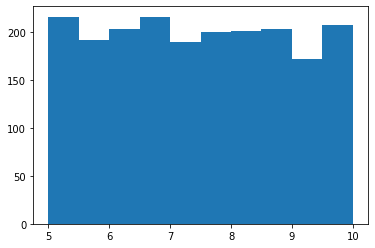

In [6]:
x = np.random.rand(2000)*(10-5) + 5

print(f'Mean: {np.mean(x):.4f}')
print(f'Std: {np.std(x):.4f}')

plt.figure()
plt.hist(x)
plt.show()

Generate an array composed by 1000 values drawn from a gaussian distribution with mean value 3 and variance 1.5. Check the actual values of the mean and variance of the elements of this arrays and plot the distribution.

Repeat the process with arrays drawn from the same distribution, composed of either 10 and 10000 samples; how do the mean and variance estimates change? Plot the three histograms in the same figure

Mean: 2.9790
Std: 1.5373


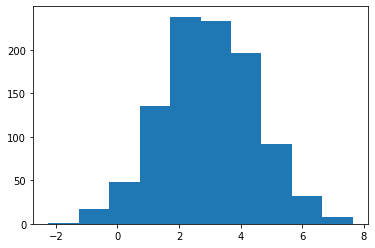

In [10]:
x = np.random.randn(1000)*1.5 + 3

print(f'Mean: {np.mean(x):.4f}')
print(f'Std: {np.std(x):.4f}')

plt.figure()
plt.hist(x)
plt.show()

## 2.3 - Least squares fitting

### 2.3.1 - Define the signal

Define a vector X, composed of 100 equally spaced values between 0 and 50. Define Y as 0.2 * X + 1.

In [12]:
x = np.linspace(0,50,100)
y = 0.2*x + 1

Plot the (X,Y) points, as black dots.

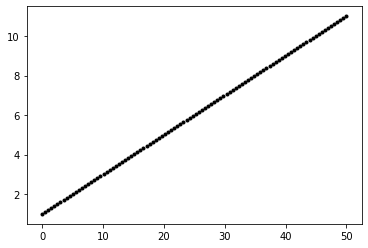

In [13]:
plt.figure()
plt.plot(x, y, 'k.')
plt.show()

Add zero mean noise with variance 0.1 on the Y values, to define the vector Y_noise. Plot (X,Y) in black dots and (X,Y_noise) in red dots

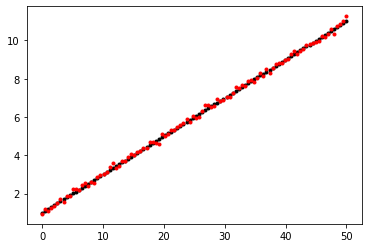

In [14]:
n = np.random.randn(y.size) * 0.1
y_noisy = y + n

plt.figure()
plt.plot(x, y, 'k.')
plt.plot(x, y_noisy, 'r.')
plt.show()

### 2.3.2 - Write the fit function

Define a function `ls_fit` that takes as input a vector of X values and a vector of corresponding Y values and find the angular coefficient A and the intercept B of the best fitting line.

For this step, you can either use pre-built methods in Numpy (or Scipy https://docs.scipy.org/doc/), or write your own equations.

In [17]:
def ls_fit(x, y):
  A, B = np.polyfit(x, y, 1)
  return A, B

### 2.3.3 - Apply the fit function and plot the results

Apply the `ls_fit` function to the (X,Y_noise) data points.

Plot the original (X, Y_noise) points in red dots and the best fitting line in the range [0,50] in black.

Angular coefficient: 0.20
Intercept: 1.02


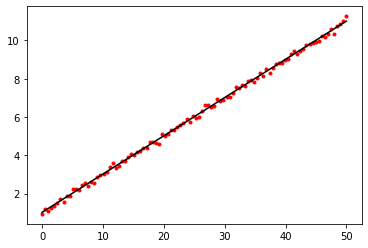

In [20]:
A, B = ls_fit(x, y_noisy)

print(f'Angular coefficient: {A:.2f}')
print(f'Intercept: {B:.2f}')

plt.figure()
plt.plot(x, y_noisy, 'r.')
plt.plot(x, A*x + B, 'k')
plt.show()

## 2.4 - Count occurencies in a dataframe

Load the Iris dataset in the same way as in the Demo 3 notebook and count the number of examples of each different species

In [21]:
# Import the pandas library
import pandas as pd

# Load the dataset

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Visualize the dataframe

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Define a list of all the species contained in the dataset, and save the results in a python dictionary

In [22]:
# Find the name of the species contained in the dataset
species = np.unique(iris['species'])

# Initialize empty dictionary
dd = {}

# Update the dictionary for each species
dd['species'] = species
print(dd)

{'species': array(['setosa', 'versicolor', 'virginica'], dtype=object)}


## 2.5 - Filter elements in the dataframe

Create a copy of the dataframe with only the elements with a `petal_width` less than 1.5.

In [25]:
# Create a copy of the dataset
data = iris.copy(deep=True)

# Find the indexes of the rows to eliminate
rows_to_eliminate = np.where(data['petal_width'] < 1.5)[0]

# Drop the rows
data.drop(index=rows_to_eliminate, inplace=True)

On the new dataframe, evaluate the percentage of elements of all the species

In [27]:
data['species'].value_counts()/data.shape[0]

virginica     0.765625
versicolor    0.234375
Name: species, dtype: float64

Compare the species by species number of element with a `petal_width` smaller than 1.5

In [29]:
iris[iris['petal_width'] < 1.5]['species'].value_counts()/iris[iris['petal_width'] < 1.5].shape[0]

setosa        0.581395
versicolor    0.406977
virginica     0.011628
Name: species, dtype: float64

Define the species by species mean `sepal_length`. Save the results in a dictionary

In [31]:
sep_len = {k: iris[iris['species'] == k]['sepal_length'].mean(axis=0) for k in dd['species']}
print(sep_len)

{'setosa': 5.005999999999999, 'versicolor': 5.936, 'virginica': 6.587999999999998}


## 2.6 Visualize the dataframe

Plot the species by species `petal_width` histogram on the original dataset, each in a separate `subplot`

<span style='color:red;font-weight:bold;'>Warning</span>: no reload of the dataset is allowed. Careful with slicing and copying in the previous points

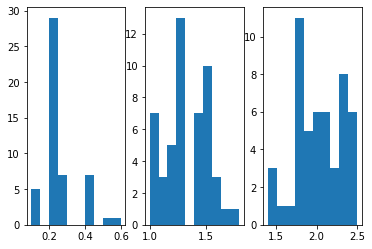

In [32]:
plt.figure()
for i,s in enumerate(dd['species']):
  plt.subplot(1, 3, i+1)
  plt.hist(iris[iris['species'] == s]['petal_width'])
plt.show()

In different plots, plot all the combinations of 2 different features, using dots of a different color for each species

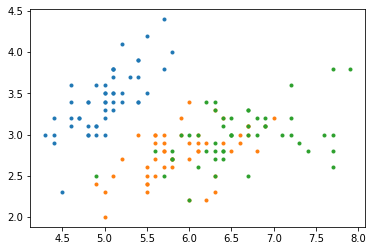

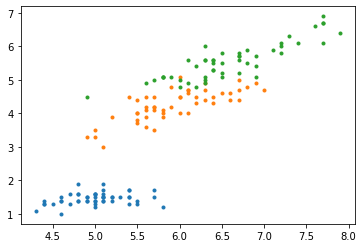

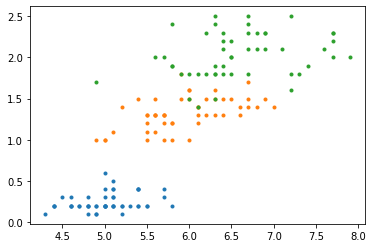

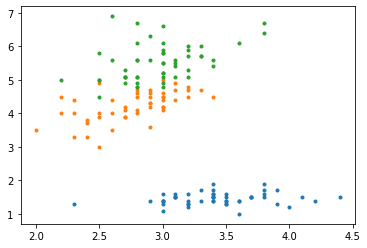

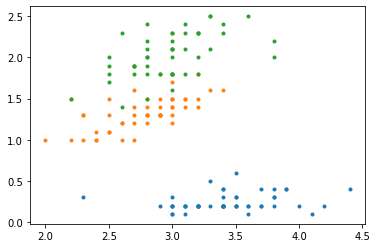

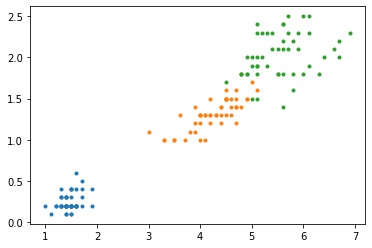

In [34]:
features = ['sepal_length',	'sepal_width',	'petal_length',	'petal_width']

from itertools import combinations

comb = combinations(features, 2)
for c in comb:
  plt.figure()
  for s in dd['species']:
    iris_port = iris[iris['species'] == s]
    plt.plot(iris_port[c[0]], iris_port[c[1]], '.')
  plt.show()

In different 3-D plots, plot all the combinations of 3 different features, using dots of a different color for each species

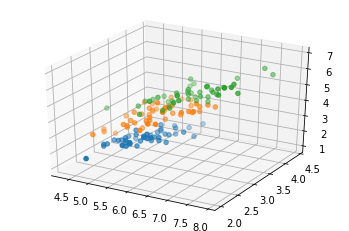

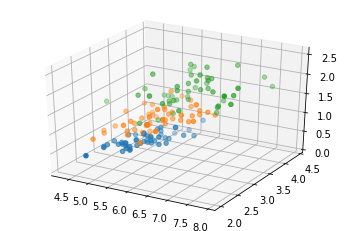

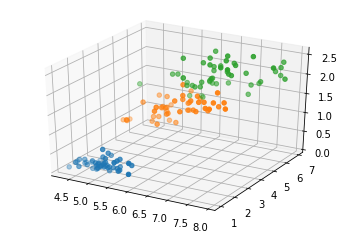

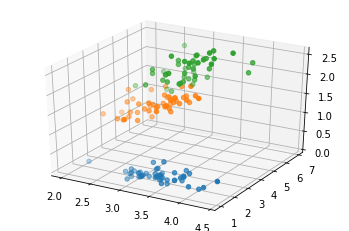

In [35]:
comb = combinations(features, 3)
for c in comb:
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  for s in dd['species']:
    iris_port = iris[iris['species'] == s]
    ax.scatter(iris_port[c[0]], iris_port[c[1]], iris_port[c[2]], '.')
  plt.show()